In [1]:
import pandas as pd
from pysyncon import Dataprep, Synth

In [2]:
df = pd.read_csv("texas.csv")

dataprep = Dataprep(
    foo=df,
    predictors=["income", "ur", "poverty"],
    predictors_op="mean",
    time_predictors_prior=range(1985, 1994),
    special_predictors=[
        ("bmprison", [1988], "mean"),
        ("bmprison", [1990], "mean"),
        ("bmprison", [1991], "mean"),
        ("bmprison", [1992], "mean"),
        ("alcohol", [1990], "mean"),
        ("aidscapita", [1990], "mean"),
        ("aidscapita", [1991], "mean"),
        ("black", [1990], "mean"),
        ("black", [1991], "mean"),
        ("black", [1992], "mean"),
        ("perc1519", [1990], "mean"),
    ],
    dependent="bmprison",
    unit_variable="state",
    time_variable="year",
    treatment_identifier="Texas",
    controls_identifier=[
        "Alabama",
        "Alaska",
        "Arizona",
        "Arkansas",
        "California",
        "Colorado",
        "Connecticut",
        "Delaware",
        "District of Columbia",
        "Florida",
        "Georgia",
        "Hawaii",
        "Idaho",
        "Illinois",
        "Indiana",
        "Iowa",
        "Kansas",
        "Kentucky",
        "Louisiana",
        "Maine",
        "Maryland",
        "Massachusetts",
        "Michigan",
        "Minnesota",
        "Mississippi",
        "Missouri",
        "Montana",
        "Nebraska",
        "Nevada",
        "New Hampshire",
        "New Jersey",
        "New Mexico",
        "New York",
        "North Carolina",
        "North Dakota",
        "Ohio",
        "Oklahoma",
        "Oregon",
        "Pennsylvania",
        "Rhode Island",
        "South Carolina",
        "South Dakota",
        "Tennessee",
        "Utah",
        "Vermont",
        "Virginia",
        "Washington",
        "West Virginia",
        "Wisconsin",
        "Wyoming",
    ],
    time_optimize_ssr=range(1985, 1994),
)

synth = Synth()
synth.fit(dataprep=dataprep, optim_method="BFGS", optim_initial="ols")

In [3]:
synth.weights(threshold=0.001)

California    0.408
Florida       0.111
Illinois      0.360
Louisiana     0.122
Name: weights, dtype: float64

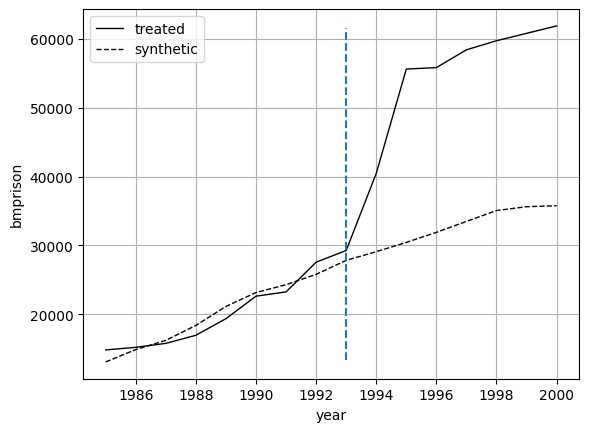

In [4]:
synth.path_plot(treatment_time=1993)

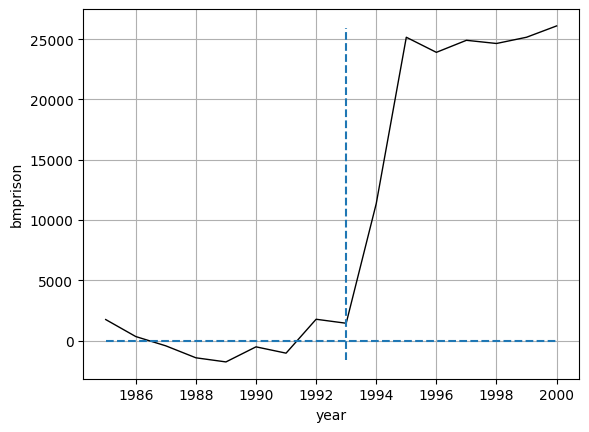

In [5]:
synth.gaps_plot(treatment_time=1993)

In [6]:
synth.summary()

,V,treated,synthetic,sample mean
income,0.000,16485.778,19001.457,17480.102
ur,0.000,7.399,7.312,6.167
poverty,0.000,17.222,15.166,13.492
special.1.bmprison,0.041,16956.000,18390.115,4872.160
special.2.bmprison,0.041,22634.000,23158.777,6098.230
special.3.bmprison,0.056,23249.000,24298.438,6560.480
special.4.bmprison,0.145,27568.000,25803.951,6971.660
special.5.alcohol,0.000,2.470,2.713,2.504
special.6.aidscapita,0.015,13.590,15.025,8.763
special.7.aidscapita,0.016,14.835,17.275,10.126
